<a href="https://colab.research.google.com/github/ajdduck/DataScience_Python/blob/master/kakao_gift_give.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 나눔고딕 설치

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 

In [0]:
df_give = pd.read_csv("/content/drive/My Drive/df_give.csv")

In [0]:
df_give.head()

,선물 횟수,사용 이유,선물 이유,상품의 가격대,상대방의 필요성,상품의 종류,상품의 품질,보낸 선물,성별,직업,나이
0,4회 이상,c,"A, C",3,4,4,4,mobile,여,대학생,20대
1,2회,c,"A, C",4,4,4,4,mobile,여,대학생,20대
2,1회 미만,c,"C, D",3,3,3,3,mobile,여,대학생,20대
3,1회 미만,b,"A, D",2,4,3,3,mobile,여,대학생,20대
4,1회,c,"A, C",3,3,3,4,mobile,여,대학생,20대


In [0]:
# 카카오톡 선물하기를 왜 이용하는가?

s = df_give['사용 이유'].value_counts()
df_use_reason = s.to_frame()
df_use_reason.sort_index(inplace=True)

df_use_reason

,사용 이유
a,6
b,1
c,43
d,1


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backe

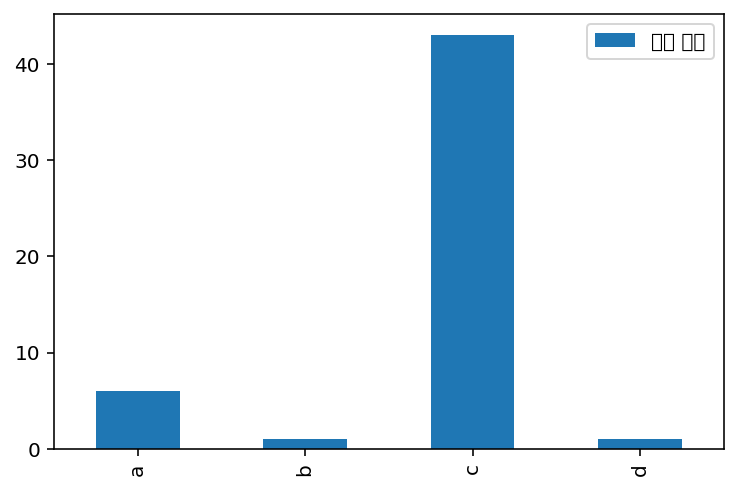

In [0]:
df_use_reason.plot(kind = 'bar')

In [0]:
# 카카오톡 선물하기에서 어떤 형태로 선물을 보내는가?

df_gift_kind = df_give['보낸 선물'].value_counts().to_frame()
df_gift_kind

,보낸 선물
mobile,46
delivery,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f63c2518>],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45240 missing from current font.
  font.set_te

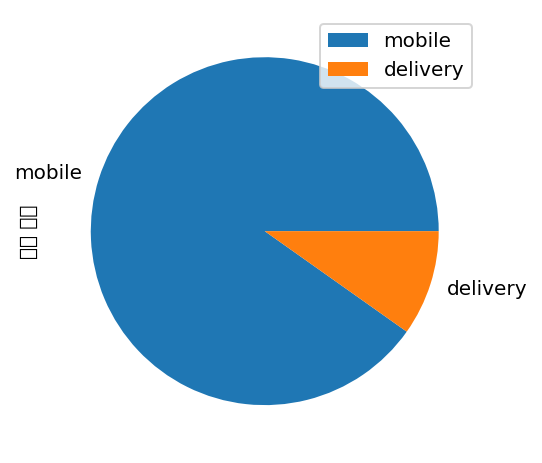

In [0]:
df_gift_kind.plot(kind='pie', subplots = True)

In [0]:
df_give_mod = df_give.copy()
df_give_mod = df_give_mod[['선물 횟수', '사용 이유', '선물 이유', '상품의 가격대']]
df_give_mod.head()

,선물 횟수,사용 이유,선물 이유,상품의 가격대
0,4회 이상,c,"A, C",3
1,2회,c,"A, C",4
2,1회 미만,c,"C, D",3
3,1회 미만,b,"A, D",2
4,1회,c,"A, C",3


In [0]:
df_give_mod.columns = ['var1', 'var2', 'var3', 'var4']

In [0]:
df_give_mod = (df_give_mod.set_index(df_give_mod.columns.drop('var3', 2).tolist())
                          .var3.str.split(', ', expand=True)
                          .stack()
                          .reset_index()
                          .rename(columns={0:'var3'})
                          .loc[:, df_give_mod.columns]
                        )
df_give_mod.head()

,var1,var2,var3,var4
0,4회 이상,c,A,3
1,4회 이상,c,C,3
2,2회,c,A,4
3,2회,c,C,4
4,1회 미만,c,C,3


In [0]:
df_give_mod.columns = ['선물 횟수', '사용 이유', '선물 이유', '상품의 가격대']

df_give_mod.head()

,선물 횟수,사용 이유,선물 이유,상품의 가격대
0,4회 이상,c,A,3
1,4회 이상,c,C,3
2,2회,c,A,4
3,2회,c,C,4
4,1회 미만,c,C,3


In [0]:
df_give_reason = df_give_mod['선물 이유'].value_counts().to_frame().sort_index()
df_give_reason

,선물 이유
A,45
B,9
C,34
D,10
E,2
F,2


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_te

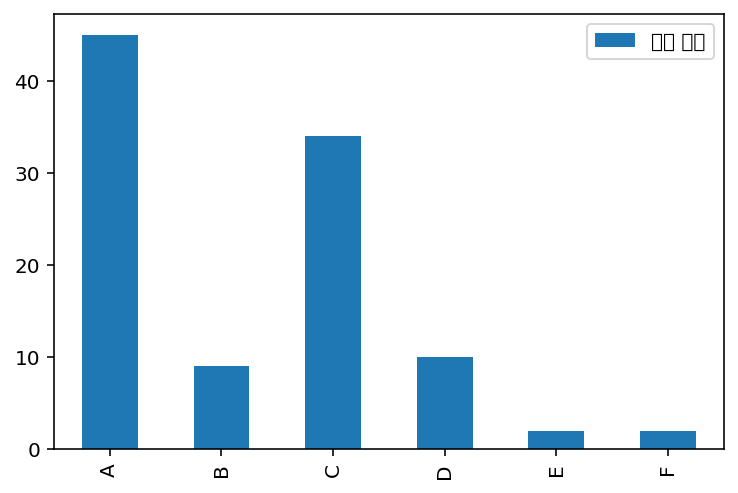

In [0]:
df_give_reason.plot(kind = 'bar')

In [0]:
df_give_mod = df_give.copy()
df_give_mod = df_give_mod[['선물 횟수', '사용 이유', '선물 이유', '상품의 가격대']]

df_give_mod.columns = ['var1', 'var2', 'var3', 'var4']

df_give_mod = (df_give_mod.set_index(df_give_mod.columns.drop('var3', 2).tolist())
                          .var3.str.split(', ', expand=True)
                          .stack()
                          .reset_index()
                          .rename(columns={0:'var3'})
                          .loc[:, df_give_mod.columns]
                        )

df_give_mod.columns = ['선물 횟수', '사용 이유', '선물 이유', '상품의 가격대']

In [0]:
df_give_mod = df_give_mod.astype({'상품의 가격대':str})
rows_number = df_give_mod.shape[0]

dataset = []

for i in range(rows_number):
  row_list = df_give_mod.loc[i, :].tolist()
  dataset.append(row_list)

In [0]:
te = TransactionEncoder() 
te_result = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_result, columns=te.columns_)

In [0]:
itemset = apriori(df, use_colnames=True) 
itemset

,support,itemsets
0,0.529412,(3)
1,0.843137,(c)


In [0]:
itemset = apriori(df, min_support=0.3, use_colnames=True) 
itemset

,support,itemsets
0,0.372549,(1회)
1,0.529412,(3)
2,0.392157,(4)
3,0.441176,(A)
4,0.333333,(C)
5,0.843137,(c)
6,0.313725,"(1회, c)"
7,0.431373,"(c, 3)"
8,0.352941,"(4, c)"
9,0.362745,"(A, c)"


In [0]:
association_rules(itemset, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1회),(c),0.372549,0.843137,0.313725,0.842105,0.998776,-0.000384,0.993464
1,(c),(1회),0.843137,0.372549,0.313725,0.372093,0.998776,-0.000384,0.999274
2,(c),(3),0.843137,0.529412,0.431373,0.511628,0.966408,-0.014994,0.963585
3,(3),(c),0.529412,0.843137,0.431373,0.814815,0.966408,-0.014994,0.847059
4,(4),(c),0.392157,0.843137,0.352941,0.900000,1.067442,0.022299,1.568627
5,(c),(4),0.843137,0.392157,0.352941,0.418605,1.067442,0.022299,1.045490
6,(A),(c),0.441176,0.843137,0.362745,0.822222,0.975194,-0.009227,0.882353
7,(c),(A),0.843137,0.441176,0.362745,0.430233,0.975194,-0.009227,0.980792
